In [66]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import xarray as xr

import statsmodels.api as sm

# Mock timeseries analysis

In [86]:
def linear_regression(y, *x):
    X = [xx for xx in x]
    X = np.column_stack(X)
    X = sm.add_constant(X)
    
    return sm.OLS(y, X, hasconst = True).fit()

In [136]:
np.mean(random)

-8.533478934373752e-16

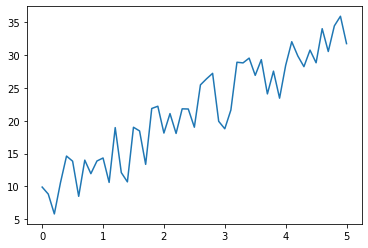

In [134]:
# Mock timeseries
samples = 51
random = np.random.random(samples)*10
random = (random - np.mean(random))

t1 = np.linspace(0, 5, samples)
p = 5*t1 + 9 + random
plt.plot(t1,p)

In [132]:
result = linear_regression(p, t1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     327.7
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           2.40e-23
Time:                        17:19:09   Log-Likelihood:                -127.25
No. Observations:                  51   AIC:                             258.5
Df Residuals:                      49   BIC:                             262.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8668      0.826     16.788      0.000      12.207      15.527
x1             5.1542      0.285     18.103      0.000       4.582       5.726
==============================================================================
Omnibus:                       16.613   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.475
Skew:                          -0.008   Prob(JB):                        0.176
Kurtosis:                       1.721   Cond. No.                         6.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Techniques on uptake

stats linregress: https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py

In [96]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5,6])

df = df.loc[1959:2017]

ocean = -df["ocean sink"]
land_model = -df["land sink"]
land = -df["land sink"]-df["budget imbalance"]

temp = pd.read_csv('./../co2_temp_data/temp/temp_annual.csv', index_col="Year").Temp

y = land.values
y

array([-1.37638945, -1.91675189, -1.81886027, -2.30795375, -2.23312736,
       -2.2771638 , -0.9222639 , -1.05487483, -2.38411267, -1.7195801 ,
       -1.20467144, -1.89057522, -2.78746728, -1.13169868, -1.35446052,
       -3.06763075, -1.77170661, -2.56150247, -0.56832412, -1.9057209 ,
       -0.55775965, -1.12462956, -2.17793544, -2.39609808, -0.48296698,
       -2.05300625, -1.46022758, -2.836112  ,  0.52899359, -0.75909742,
       -2.73139142, -3.03337004, -3.98694826, -3.76627625, -2.73592314,
       -2.000107  , -1.5379476 , -3.5998759 , -2.19174472,  0.25082342,
       -2.92327086, -3.48142003, -2.36455193, -1.12373072, -1.72597259,
       -3.66188795, -1.89394981, -3.56129785, -2.77561836, -3.8808372 ,
       -4.44483687, -3.03644531, -4.7385349 , -3.6242375 , -3.52822754,
       -4.41066926, -2.53123181, -2.35835452, -4.10629804])

x1 = co2, x2 = temp

In [97]:
x1 = pd.read_csv("./../co2_temp_data/co2/co2_global.csv", index_col="Year")
x1 = x1.loc[1959:2017].values.squeeze()
x1

array([315.486 , 316.163 , 316.856 , 317.558 , 318.268 , 318.997 ,
       319.757 , 320.56  , 321.41  , 322.31  , 323.26  , 324.259 ,
       325.303 , 326.392 , 327.526 , 328.702 , 329.921 , 331.187 ,
       332.505 , 333.874 , 335.286 , 336.732 , 338.202 , 339.69  ,
       341.194 , 342.712 , 344.239 , 345.771 , 347.301 , 348.822 ,
       350.318 , 351.782 , 353.219 , 354.64  , 356.068 , 357.527 ,
       359.037 , 360.604 , 362.231 , 363.916 , 365.652 , 367.431 ,
       369.251 , 371.114 , 373.017 , 374.952 , 376.91  , 378.887 ,
       380.88  , 382.892 , 384.927 , 386.995 , 389.101 , 391.248 ,
       393.435 , 395.651 , 397.886 , 400.13  , 403.5225])

In [98]:
x2 = temp.values.squeeze()
x2

array([14.03, 13.98, 14.06, 14.04, 14.05, 13.8 , 13.89, 13.94, 13.98,
       13.92, 14.06, 14.03, 13.92, 14.01, 14.16, 13.93, 13.99, 13.9 ,
       14.18, 14.07, 14.17, 14.26, 14.32, 14.14, 14.31, 14.16, 14.12,
       14.18, 14.32, 14.39, 14.27, 14.45, 14.41, 14.22, 14.23, 14.32,
       14.45, 14.33, 14.47, 14.61, 14.39, 14.4 , 14.54, 14.63, 14.63,
       14.54, 14.68, 14.64, 14.67, 14.55, 14.66, 14.73, 14.61, 14.65,
       14.69, 14.75, 14.9 , 15.02, 14.93])

Fundamental (derived) linear regression

In [102]:
alpha = 0.05
ssxm, ssxym, ssyxm, ssym = np.cov(x1, y, bias=1).flat
xmean, ymean = np.mean(x1), np.mean(y)

In [103]:
slope = ssxym / ssxm; slope

-0.02393030060522134

In [104]:
intercept = ymean - slope*xmean; intercept

6.124060670997264

In [105]:
r = ssxym / np.sqrt(ssxm*ssym); r

-0.5358735325843047

statsmodels linear regression

In [106]:
results = linear_regression(y, x1, x2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     25.01
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           1.74e-08
Time:                        16:34:37   Log-Likelihood:                -73.466
No. Observations:                  59   AIC:                             152.9
Df Residuals:                      56   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.5445     12.901     -3.918      0.000     -76.389     -24.700
x1            -0.0835      0.014     -5.903      0.000      -0.112      -0.055
x2             5.4202      1.225      4.424      0.000       2.966       7.875
==============================================================================
Omnibus:                        1.448   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                0.776
Skew:                           0.223   Prob(JB):                        0.679
Kurtosis:                       3.341   Cond. No.                     4.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
results.conf_int(0.05).squeeze()

array([[-7.63889712e+01, -2.47000679e+01],
       [-1.11786858e-01, -5.51378232e-02],
       [ 2.96567692e+00,  7.87475286e+00]])

In [109]:
Y = results.params[0]*np.ones(len(x1)) + results.params[1]*x1 + results.params[2]*x2

## Tests

Based off: https://towardsdatascience.com/verifying-and-tackling-the-assumptions-of-linear-regression-32126acea67b

### Linear relationship

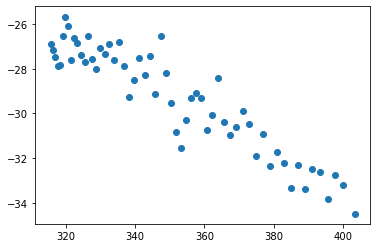

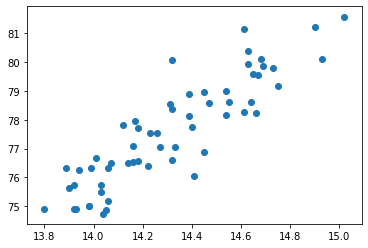

In [110]:
residual = y - Y

plt.figure()
plt.scatter(x1, residual + res.params[1]*x1)

plt.figure()
plt.scatter(x2, residual + res.params[2]*x2)

### Homoscedasticity

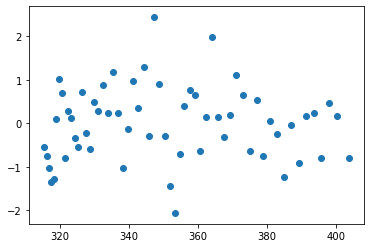

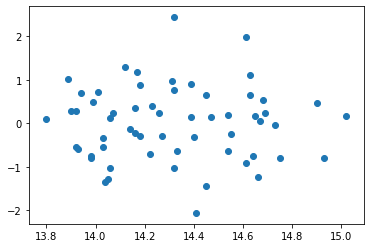

In [111]:
plt.figure()
plt.scatter(x1, residual)
plt.figure()
plt.scatter(x2, residual)

In [189]:
stats.linregress(x, residual)

LinregressResult(slope=-2.0712440049415837e-18, intercept=8.185398499666496e-16, rvalue=-5.493504969217935e-17, pvalue=0.9999999999999997, stderr=0.004993951437733342)

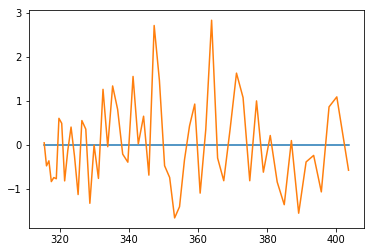

In [190]:
plt.plot(x, stats.linregress(x, residual)[0]*x + stats.linregress(x, residual)[1])
plt.plot(x, residual)

Add temperature to regression

In [191]:
temp = pd.read_csv("./../co2_temp_data/temp/HADCRUT4_annual.txt", delim_whitespace=1,
                   index_col="Year",
                   usecols=[0,13]
                  )
temp = temp.loc[1959:2017]

x1 = x
x2 = 14 + temp.values.squeeze()

In [192]:
X = np.column_stack((X, x2))

In [193]:
mod = sm.OLS(y,X)
res = mod.fit()
res.conf_int(0.05).squeeze()

array([[-6.77785809e+01, -1.78520704e+01],
       [-8.98891010e-02, -4.32111496e-02],
       [ 2.22369761e+00,  6.77949928e+00]])

In [194]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     22.27
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           7.64e-08
Time:                        12:40:56   Log-Likelihood:                -75.027
No. Observations:                  59   AIC:                             156.1
Df Residuals:                      56   BIC:                             162.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.8153     12.461     -3.436      0.001     -67.779     -17.852
x1            -0.0666      0.012     -5.712      0.000      -0.090      -0.043
x2             4.5016      1.137      3.959      0.000       2.224       6.779
==============================================================================
Omnibus:                        1.974   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.391
Skew:                           0.368   Prob(JB):                        0.499
Kurtosis:                       3.159   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Absense of multicollinearity

In [195]:
np.corrcoef(x1,x2)

array([[1.        , 0.92405523],
       [0.92405523, 1.        ]])

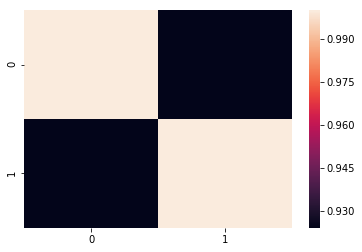

In [196]:
seaborn.heatmap(np.corrcoef(x1,x2))

In [197]:
# VIF score
r = np.corrcoef(x1,x2)[0][1]
VIF = 1/(1-r**2)
r, VIF

(0.9240552304848763, 6.843599677774054)

Seems here that temperature and CO2 are highly correlated on a global scale and VIF is above 5 (but below 10).

## Independence of residuals

## Normality of errors

(array([0.11553097, 0.15404129, 0.3465929 , 0.38510322, 0.50063419,
        0.46212386, 0.11553097, 0.11553097, 0.03851032, 0.03851032]),
 array([-1.8306381 , -1.39051837, -0.95039863, -0.5102789 , -0.07015917,
         0.36996056,  0.81008029,  1.25020002,  1.69031975,  2.13043949,
         2.57055922]),
 <a list of 1 Patch objects>)

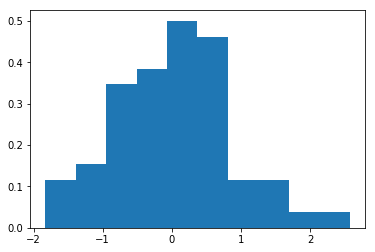

In [220]:
plt.hist(res.resid, density=1, histtype="stepfilled")

In [206]:
np.mean(res.resid), np.std(res.resid)

(1.0149771795159584e-12, 0.8630465883419473)

In [209]:
stats.norm.pdf(res.resid)

array([0.3199438 , 0.27501623, 0.21541821, 0.14054404, 0.13432929,
       0.38656452, 0.29412691, 0.37150696, 0.27367908, 0.39874038,
       0.39857736, 0.3687681 , 0.35060107, 0.31760689, 0.39856126,
       0.36274112, 0.32333675, 0.37433079, 0.20799969, 0.37034736,
       0.17317203, 0.32007315, 0.3506796 , 0.39851571, 0.20755441,
       0.33111563, 0.15460405, 0.38811062, 0.01465717, 0.15893965,
       0.39412193, 0.203156  , 0.07467899, 0.2792455 , 0.39742988,
       0.32297768, 0.31531164, 0.32662135, 0.39848483, 0.0739397 ,
       0.39297411, 0.34116732, 0.39888537, 0.20970825, 0.32959261,
       0.25934938, 0.34684505, 0.28241711, 0.39419965, 0.37051449,
       0.16853607, 0.39892302, 0.25066664, 0.39730967, 0.39537412,
       0.2676351 , 0.38065322, 0.35629421, 0.35092271])